In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
import seaborn as sns
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [3]:
stat_years = ['2015', '2016', '2017', '2018', '2019']

In [21]:
# Создаем датафреймы для данных каждого из имеющихся годов

for i in stat_years:
    locals()['df_{}'.format(int(i))] = pd.read_csv(i+'.csv')
    locals()['df_{}'.format(int(i))]['year'] = i
    locals()['df_{}'.format(int(i))]



In [22]:
# Приводим к единому виду. 2015-2017 г один из критериев 'Family', в 2018-2019 его заменяет критерий 'Social_support'.
# Иные критерии здесь отброшены, поскольку встречаются в единичных случаях

df_2015 = df_2015.iloc[:, [0, 2, 3, 5, 6, 7, 8, 9, 10, 12 ]]
df_2015.columns = ['Country', 'Happiness_rank', 'Happiness_score', 'GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom', 'Trust', 'Generosity', 'Year']
df_2016 = df_2016.iloc[:, [0, 2, 3, 6, 7, 8, 9, 10, 11, 13 ]]
df_2016.columns = ['Country', 'Happiness_rank', 'Happiness_score', 'GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom', 'Trust', 'Generosity', 'Year']
df_2017 = df_2017.iloc[:, [0, 1, 2, 5, 6, 7, 8, 9, 10, 12 ]]
df_2017.columns = ['Country', 'Happiness_rank', 'Happiness_score', 'GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom', 'Generosity', 'Trust', 'Year']
df_2018.columns = ['Happiness_rank', 'Country', 'Happiness_score', 'GDP_per_Capita', 'Social_support', 'Health_Life_Expectancy', 'Freedom', 'Generosity', 'Trust', 'Year']
df_2019.columns = ['Happiness_rank', 'Country', 'Happiness_score', 'GDP_per_Capita', 'Social_support', 'Health_Life_Expectancy', 'Freedom', 'Generosity', 'Trust', 'Year']

In [27]:
df_max = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True, sort=True)

In [200]:
# Десятка самых "счастливых" стран
thebest = df_max.sort_values(['Happiness_rank', 'Country'], ascending=True).head(50)
#thebest

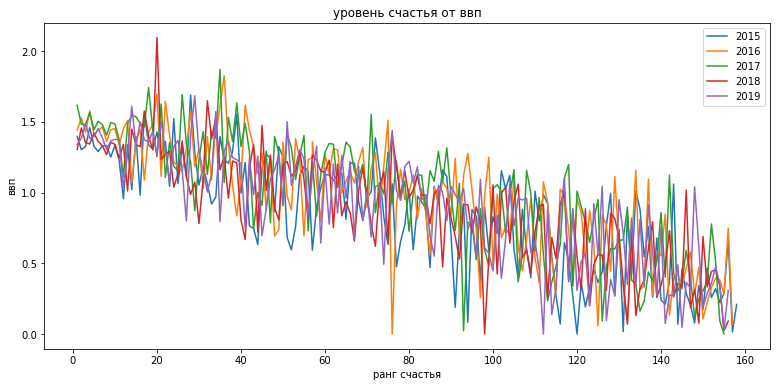

In [41]:
plt.plot(df_2015.Happiness_rank, df_2015.GDP_per_Capita, label='2015')
plt.plot(df_2016.Happiness_rank, df_2016.GDP_per_Capita, label='2016')
plt.plot(df_2017.Happiness_rank, df_2017.GDP_per_Capita, label='2017')
plt.plot(df_2018.Happiness_rank, df_2018.GDP_per_Capita, label='2018')
plt.plot(df_2019.Happiness_rank, df_2019.GDP_per_Capita, label='2019')

plt.title('уровень счастья от ввп')
plt.xlabel('ранг счастья')
plt.ylabel('ввп')
plt.legend()

# Вывод: не ВВП единым счастлив человек. Определенная зависимость прослеживается, При падении уровня ВВП
# уровень "счастья" стремится вниз. Однако экстремумы графиков показывают, что страны с низким ВВП 
# могут иметь более высокий ранг "счастья": например, Сомали 2017 год, ранг 93, вклад ВВП 0.022, Катар 2017 год, ранг 35, вклад ВВП 1.87,
# ОАЭ 2018г, ранг 20, вклад ВВП 2.096

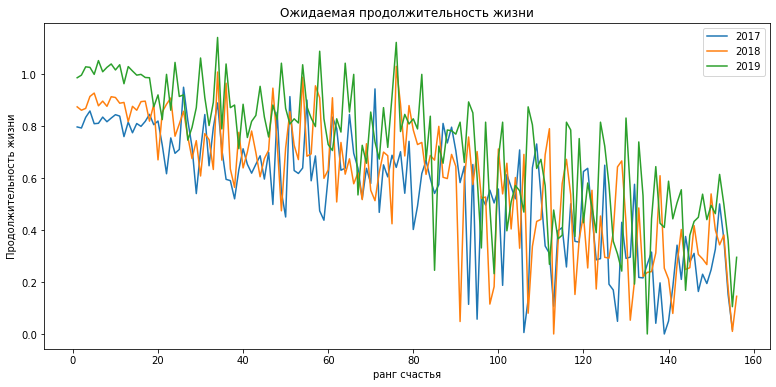

In [52]:
#plt.plot(df_2015.Happiness_rank, df_2015.Health_Life_Expectancy, label='2015')
#plt.plot(df_2016.Happiness_rank, df_2016.Health_Life_Expectancy, label='2016')
plt.plot(df_2017.Happiness_rank, df_2017.Health_Life_Expectancy, label='2017')
plt.plot(df_2018.Happiness_rank, df_2018.Health_Life_Expectancy, label='2018')
plt.plot(df_2019.Happiness_rank, df_2019.Health_Life_Expectancy, label='2019')

plt.title('Ожидаемая продолжительность жизни')
plt.xlabel('ранг счастья')
plt.ylabel('Продолжительность жизни')
plt.legend()

# Во-первых, сразу можно заметить, что ожидаемая продолжительность жизни с годами увеличивается. 
# Оссобенно резкий "скачок" произошел с 2018 на 2019 год.
# Во-вторых, РАзброс ОПЖ в странах первой "двадцатки" по уровню счастья, значительно ниже. В странах 
# с низким рейтингом счастья, разброс может быть значительным, например: 2015 год, Свазиленд, ранг 100, ОПЖ 0.076,
# Греция, ранг 101, ОПЖ 0.88.
# В-третьих,так же как и с ВВП есть некотрая тенденция к снижению уровня "счастья" при снижении ОПЖ 
#

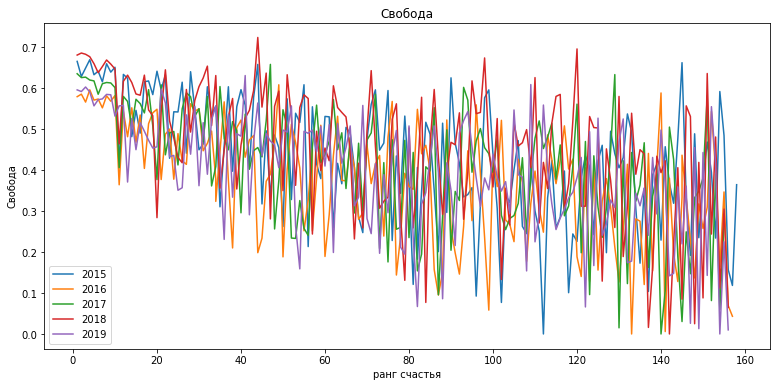

In [81]:
plt.plot(df_2015.Happiness_rank, df_2015.Freedom, label='2015')
plt.plot(df_2016.Happiness_rank, df_2016.Freedom, label='2016')
plt.plot(df_2017.Happiness_rank, df_2017.Freedom, label='2017')
plt.plot(df_2018.Happiness_rank, df_2018.Freedom, label='2018')
plt.plot(df_2019.Happiness_rank, df_2019.Freedom, label='2019')

plt.title('Свобода')
plt.xlabel('ранг счастья')
plt.ylabel('Свобода')
plt.legend()

# Для начала, можно отметить, что отношение к свободе в некотором роде изменяется от года к году,
# приобретая то большее, то меньшее значение. Возможно, это как-то связано с политическими событиями.
# Например, начиная с 2015 до 2017 года значение свободы уменьшается, в 18 году резко возрастает, а в 19 снова
# становится менее важным в определнии уровян счастья.
# Есть определенная тенденция, что в странах с более высоким уровнем счастья, свобода имеет большее значение. 
# Здесь также можно увидеть, что разброс значений значительно ниже в более "счастливых" странах.
# Однако, отношение к свободе, это похоже, что некая национальная черта. Так, например, Израиль, находящийся уверенно
# в первой 20-ке по уровню счастья (4 года держал 10 место, не считая 18-ого года), но коэффициент важности свободы 
# выбивается из общей тенденции. Италия также. Соединенные Штаты порзили тем, что там много говорят о свободе,
# # а согласно статистике коэффициент важности значения свободы относительно невысокий 0.55.
# В целом можно заметить, что с уменьшением рейтинга "счастья", среднее значение свободы замедляет "падение", 
# можно предположить, что в некотором смысле, чем ниже уровень счастья, тем большее значение приобретает свобода.

In [211]:
df_2017[140:160]

,Country,Happiness_rank,Happiness_score,GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust,Year
140,Afghanistan,141,3.794,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2017
141,Botswana,142,3.766,1.122094,1.221555,0.341756,0.505196,0.099348,0.098583,2017
142,Benin,143,3.657,0.431085,0.435300,0.209930,0.425963,0.207948,0.060929,2017
143,Madagascar,144,3.644,0.305809,0.913020,0.375223,0.189197,0.208733,0.067232,2017
144,Haiti,145,3.603,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,2017
145,Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,2017
146,South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,2017
147,Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,2017
148,Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,2017
149,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,2017


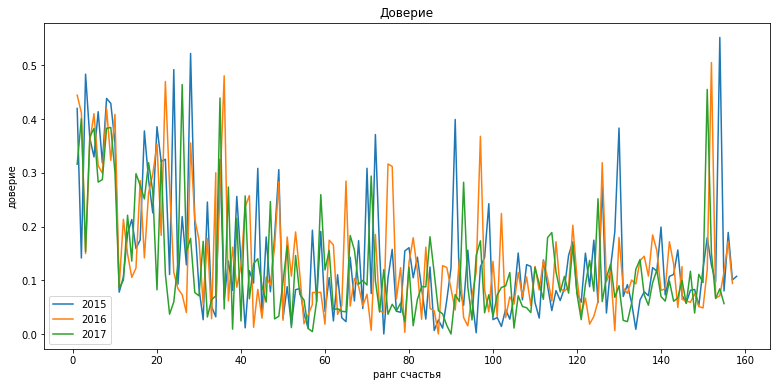

In [212]:
plt.plot(df_2015.Happiness_rank, df_2015.Trust, label='2015')
plt.plot(df_2016.Happiness_rank, df_2016.Trust, label='2016')
plt.plot(df_2017.Happiness_rank, df_2017.Trust, label='2017')
# plt.plot(df_2018.Happiness_rank, df_2018.Trust, label='2018')
# plt.plot(df_2019.Happiness_rank, df_2019.Trust, label='2019')

plt.title('Доверие')
plt.xlabel('ранг счастья')
plt.ylabel('доверие')
plt.legend()

# В странах первой двадцатки "счастливых" есть тенденция уменьшению значимости доверия.Однако после 30-40 места в рейтинге счастья
# можно увидеть, что в среднем отношение к вкладу доверия к государству не меняется.
# Любопытно выглядят яркие экстремумы. Например, 2017 год, 3 место в ранге счастья занимает Исландия, которая выбивается из общего 
# картины с крайне низким вкладом доверия в уровень счастья. Тот же год, Сингапур, 25 место в рейтинге, с очень высоким вкладом
# доверия к государству в ощущение счастья, что вполне объясняется политикой государства.


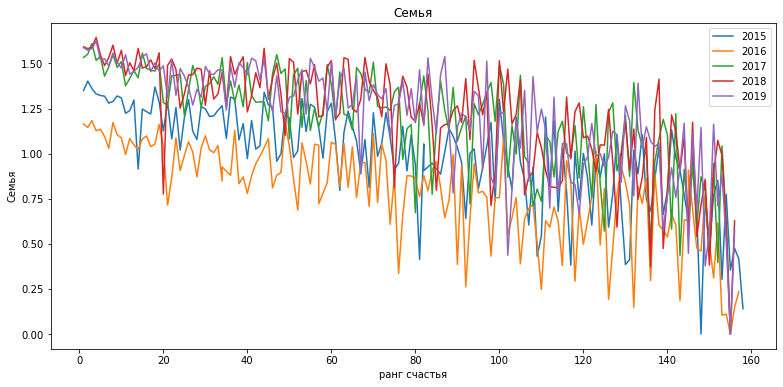

In [213]:
plt.plot(df_2015.Happiness_rank, df_2015.Family, label='2015')
plt.plot(df_2016.Happiness_rank, df_2016.Family, label='2016')
plt.plot(df_2017.Happiness_rank, df_2017.Family, label='2017')
plt.plot(df_2018.Happiness_rank, df_2018.Social_support, label='2018')
plt.plot(df_2019.Happiness_rank, df_2019.Social_support, label='2019')

plt.title('Семья')
plt.xlabel('ранг счастья')
plt.ylabel('Семья')
plt.legend()

# Сразу можно отметить, что семья в последние три года приобретает более высокую ценность с точки зрения счастья.
# В целом, есть некоторое снижение влияния семьи при снижении рейтинга счастья, но значительно меньшее, чем, например,
# уровня ввп. В 2016 году, видимо, некие мировые процессы уменьшили влияние семьи на ощущение счастья.

In [214]:
df_2017[110:120]

,Country,Happiness_rank,Happiness_score,GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust,Year
110,Namibia,111,4.574,0.964434,1.098471,0.338612,0.520304,0.077134,0.093147,2017
111,Kenya,112,4.553,0.560479,1.067951,0.309988,0.452764,0.444860,0.064641,2017
112,Mozambique,113,4.550,0.234306,0.870701,0.106654,0.480791,0.322228,0.179436,2017
113,Myanmar,114,4.545,0.367111,1.123236,0.397523,0.514492,0.838075,0.188816,2017
114,Senegal,115,4.535,0.479309,1.179692,0.409363,0.377922,0.183469,0.115460,2017
115,Zambia,116,4.514,0.636407,1.003187,0.257836,0.461603,0.249580,0.078214,2017
116,Iraq,117,4.497,1.102710,0.978613,0.501180,0.288556,0.199637,0.107216,2017
117,Gabon,118,4.465,1.198210,1.155620,0.356579,0.312329,0.043785,0.076047,2017
118,Ethiopia,119,4.460,0.339234,0.864669,0.353410,0.408843,0.312651,0.165456,2017
119,Sri Lanka,120,4.440,1.009850,1.259976,0.625131,0.561213,0.490864,0.073654,2017


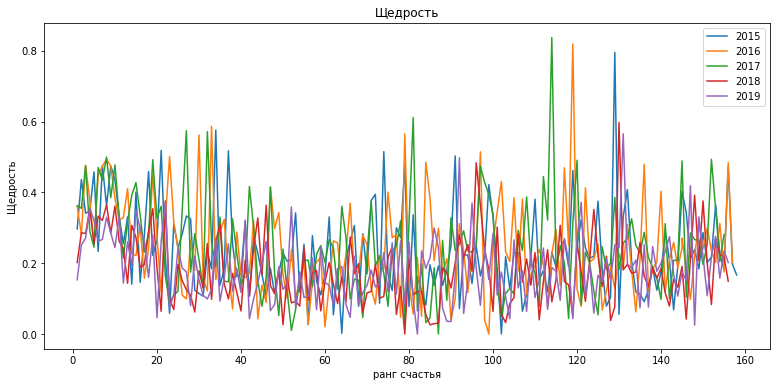

In [105]:

plt.plot(df_2015.Happiness_rank, df_2015.Generosity, label='2015')
plt.plot(df_2016.Happiness_rank, df_2016.Generosity, label='2016')
plt.plot(df_2017.Happiness_rank, df_2017.Generosity, label='2017')
plt.plot(df_2018.Happiness_rank, df_2018.Generosity, label='2018')
plt.plot(df_2019.Happiness_rank, df_2019.Generosity, label='2019')

plt.title('Щедрость')
plt.xlabel('ранг счастья')
plt.ylabel('Щедрость')
plt.legend()

# Неясно, что имеется ввиду под наименованием "щедрость", возможно, это возможность быть щедрым на государственном
# или личном уровне, иначе говоря ощущением: я могу поделиться. ВВидно, что вклад щедрости в ощущение счастья не высокий.
# есть отдельные страны, которые, видимо,  по неким национальным традициям придают высокое значение щедрости. 
# Самые яркие максимумы 2015, 2016, 2017 года принадлежат республике Мьянма.

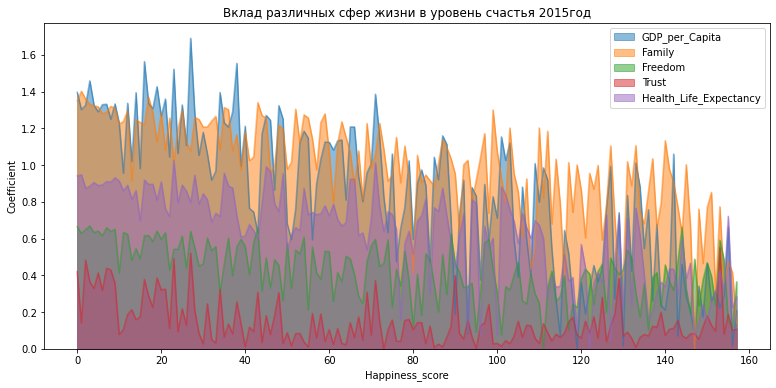

In [195]:
ax = df_2015[['GDP_per_Capita', 'Family', 'Freedom', 'Trust', 'Health_Life_Expectancy']].plot(kind='area',
                  stacked=False,
                  title='Вклад различных сфер жизни в уровень счастья 2015год', 
                  xlabel='Happiness_score', 
                  ylabel='Coefficient')

# Наибольшее значение в ощущение счастья в 2015 году вносили ВВП и семья, при этом семья значительно более равномерно влияет
# на ощущение счастья при любом рейтинге страны. Следующий критерий ОПЖ, также достаточно равномерно важен при любом уровне счастья.
# но можно заметить, что его вклад в крайне несчастливых странах становится значительно ниже.
# Меньшее значение имеет свобода. Она более значима в более счастливых странах. То же самое касается и доверия к государству.
# Большее значение оно имеет в странах первой 20-ки.

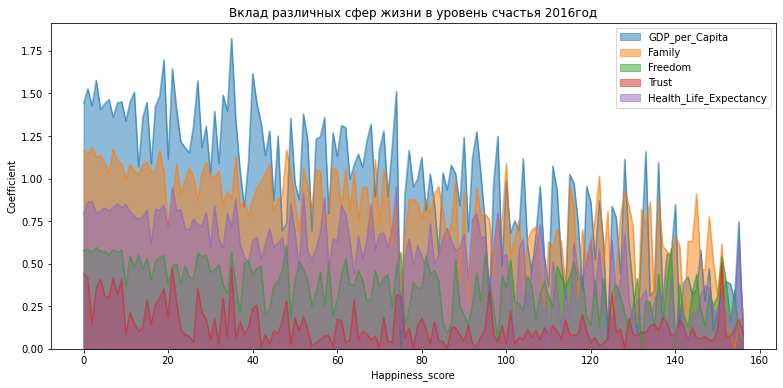

In [196]:
ax = df_2016[['GDP_per_Capita', 'Family', 'Freedom', 'Trust', 'Health_Life_Expectancy']].plot(kind='area',
                  stacked=False,
                  title='Вклад различных сфер жизни в уровень счастья 2016год', 
                  xlabel='Happiness_score', 
                  ylabel='Coefficient')

# В 2016 году экономика страны принимает высокий уровень важности для ощущения счастья. На второй план уходит семья
# (это было замечено и выше). Тенденции для ОПЖ, сводобы и доверия остаются такими же

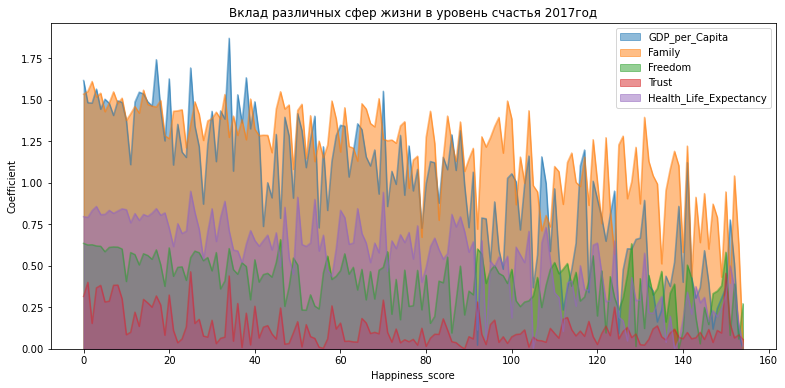

In [197]:
ax = df_2017[['GDP_per_Capita', 'Family', 'Freedom', 'Trust', 'Health_Life_Expectancy']].plot(kind='area',
                  stacked=False,
                  title='Вклад различных сфер жизни в уровень счастья 2017год', 
                  xlabel='Happiness_score', 
                  ylabel='Coefficient')

# В 2017 году семья приобретает большее значение на всех "уровнях счастья"

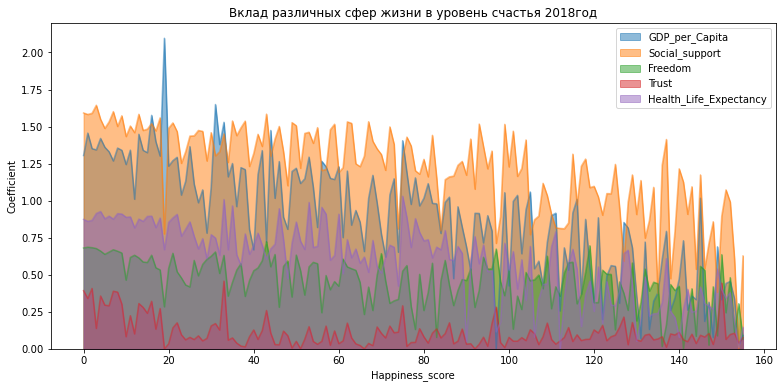

In [198]:
ax = df_2018[['GDP_per_Capita', 'Social_support', 'Freedom', 'Trust', 'Health_Life_Expectancy']].plot(kind='area',
                  stacked=False,
                  title='Вклад различных сфер жизни в уровень счастья 2018год', 
                  xlabel='Happiness_score', 
                  ylabel='Coefficient')

# в 2018 году критерий "семья" заменен на "социальная поддержка. Явно видно, что она имеет больший вес на любом уровне счастья


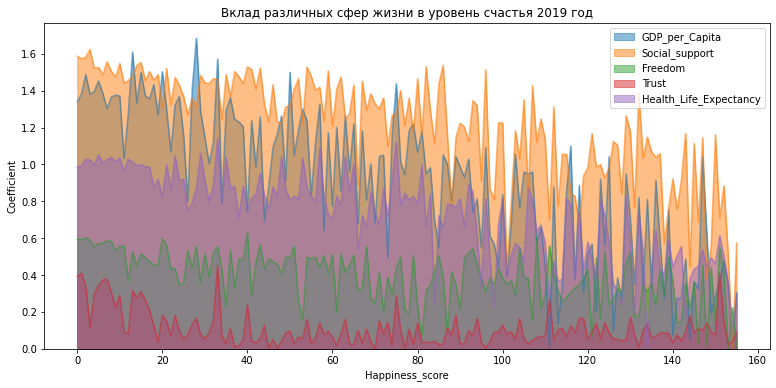

In [199]:
ax = df_2019[['GDP_per_Capita', 'Social_support', 'Freedom', 'Trust', 'Health_Life_Expectancy']].plot(kind='area',
                  stacked=False,
                  title='Вклад различных сфер жизни в уровень счастья 2019 год', 
                  xlabel='Happiness_score', 
                  ylabel='Coefficient')
# Тенденции предыдущего года сохраняются

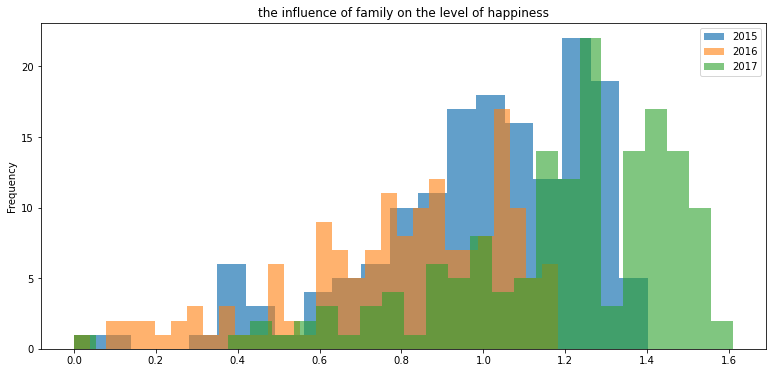

In [215]:
df_2015.Family.plot(kind='hist', 
                   bins=20,
                   ls='dashed', alpha = 0.7,
                   title='the influence of family on the level of happiness',
                   xlabel='Family',
                   ylabel='Games',
                   label='2015'
                   )
df_2016.Family.plot(kind='hist', 
                   bins=30,
                   ls='dashed', alpha = 0.6,
                   title='the influence of family on the level of happiness',
                   xlabel='Family',
                   ylabel='Games',
                   label='2016'
                   )
df_2017.Family.plot(kind='hist', 
                   bins=30,
                   ls='dashed', alpha = 0.6,
                   title='the influence of family on the level of happiness',
                   xlabel='Family',
                   ylabel='Games',
                   label='2017'
                   )

plt.legend()

# Во-первых, видим, что гистограммы смещены вправо, а значит Семья имеет высокое значение в уровне счастья.
# Во-вторых,в 2017 году отдельные страны придавали ей более высокое значение, но в 2015 году она была более значима
# для большего количества стран. в 2016 году, это было видно и ранее, видимо на фоне каких-то политических событий, 
# значение семьи значительно снизилось

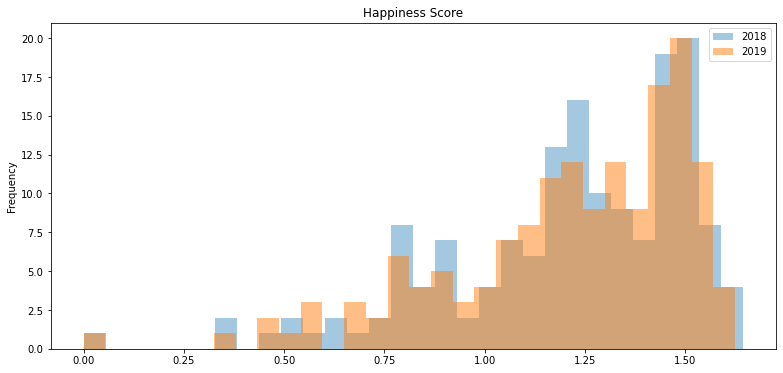

In [161]:
df_2018.Social_support.plot(kind='hist', 
                   bins=30,
                   ls='dashed', alpha = 0.4,
                   title='the influence of social support on the level of happiness',
                   xlabel='Social_support',
                   ylabel='Games',
                   label='2018'
                   )
df_2019.Social_support.plot(kind='hist', 
                   bins=30,
                   ls='dashed', alpha = 0.5,
                   title='the influence of social support on the level of happiness',
                   xlabel='Social_support',
                   ylabel='Games',
                   label='2019'
                   )
plt.legend()

# Гистограммы смещены вправо, следовательно меры социальной поддержки имеют высокое значение. 

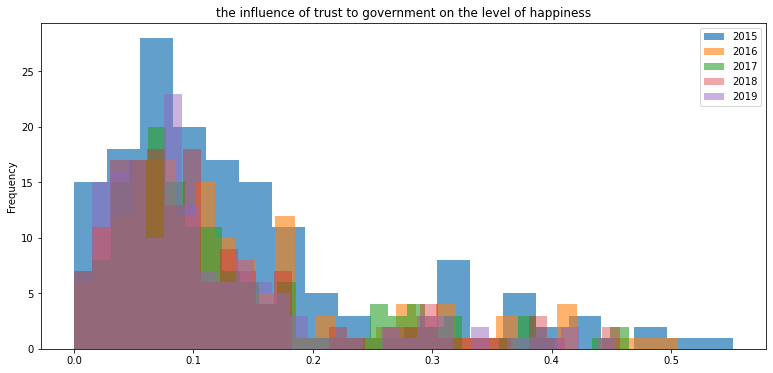

In [221]:
df_2015.Trust.plot(kind='hist', 
                   bins=20,
                   ls='dashed', alpha = 0.7,
                   title='the influence of trust to government on the level of happiness',
                   label='2015'
                   )
df_2016.Trust.plot(kind='hist', 
                   bins=30,
                   ls='dashed', alpha = 0.6,
                   title='the influence of trust to government on the level of happiness',
                   label='2016'
                   )
df_2017.Trust.plot(kind='hist', 
                   bins=30,
                   ls='dashed', alpha = 0.6,
                   title='the influence of trust to government on the level of happiness',
                   label='2017'
                   )
df_2018.Trust.plot(kind='hist', 
                   bins=30,
                   ls='dashed', alpha = 0.4,
                   title='the influence of trust to government on the level of happiness',
                   label='2018'
                   )
df_2019.Trust.plot(kind='hist', 
                   bins=30,
                   ls='dashed', alpha = 0.5,
                   title='the influence of trust to government on the level of happiness',
                   label='2019'
                   )
plt.legend()

# Гистограммы смещены влево, что говорит о том, что влияние доверия к власти оценивается не высоко.

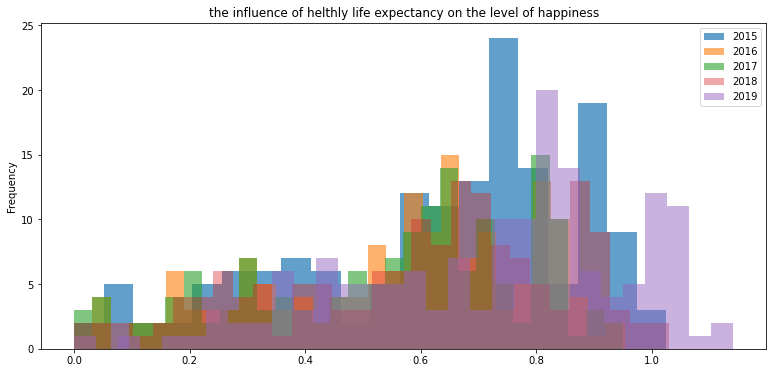

In [222]:
df_2015.Health_Life_Expectancy.plot(kind='hist', 
                   bins=20,
                   ls='dashed', alpha = 0.7,
                   title='the influence of helthly life expectancy on the level of happiness',
                   label='2015'
                   )
df_2016.Health_Life_Expectancy.plot(kind='hist', 
                   bins=30,
                   ls='dashed', alpha = 0.6,
                   title='the influence of helthly life expectancy on the level of happiness',
                   label='2016'
                   )
df_2017.Health_Life_Expectancy.plot(kind='hist', 
                   bins=30,
                   ls='dashed', alpha = 0.6,
                   title='the influence of helthly life expectancy on the level of happiness',
                   label='2017'
                   )
df_2018.Health_Life_Expectancy.plot(kind='hist', 
                   bins=30,
                   ls='dashed', alpha = 0.4,
                   title='the influence of helthly life expectancy on the level of happiness',
                   label='2018'
                   )
df_2019.Health_Life_Expectancy.plot(kind='hist', 
                   bins=30,
                   ls='dashed', alpha = 0.5,
                   title='the influence of helthly life expectancy on the level of happiness',
                   label='2019'
                   )
plt.legend()

# Гистограммы смещены вправо, большее количество стран оценивают ОПЖ как важный фактор влияния на уровень счастья.
# В 2019 году влияние ОПЖ на уровень счастья увеличилось. В 2015 можно увидеть яркие пики в районе ~0.75, 0.9. 
# Большее количество людей давало среднюю оценку влиянию счастья.

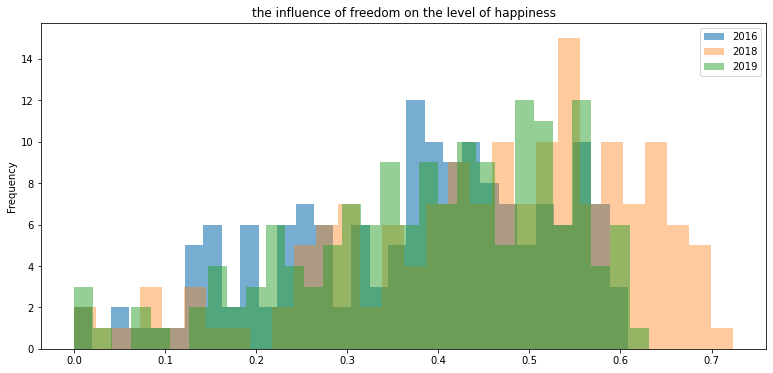

In [231]:
# df_2015.Freedom.plot(kind='hist', 
#                    bins=20,
#                    ls='dashed', alpha = 0.7,
#                    title='the influence of freedom on the level of happiness',
#                    label='2015'
#                    )
df_2016.Freedom.plot(kind='hist', 
                   bins=30,
                   ls='dashed', alpha = 0.6,
                   title='the influence of freedom on the level of happiness',
                   label='2016'
                   )
# df_2017.Freedom.plot(kind='hist', 
#                    bins=30,
#                    ls='dashed', alpha = 0.6,
#                    title='the influence of freedom on the level of happiness',
#                    label='2017'
#                    )
df_2018.Freedom.plot(kind='hist', 
                   bins=30,
                   ls='dashed', alpha = 0.4,
                   title='the influence of freedom on the level of happiness',
                   label='2018'
                   )
df_2019.Freedom.plot(kind='hist', 
                   bins=30,
                   ls='dashed', alpha = 0.5,
                   title='the influence of freedom on the level of happiness',
                   label='2019'
                   )
plt.legend()

# Гистограммы смещены вправо, низкий коэффициент встречаетсся реже, что говорит о том, что свобода важный фактор.
# В 2018 году свобода волновала значительно более количество людей, ее оценивали чаще выше.

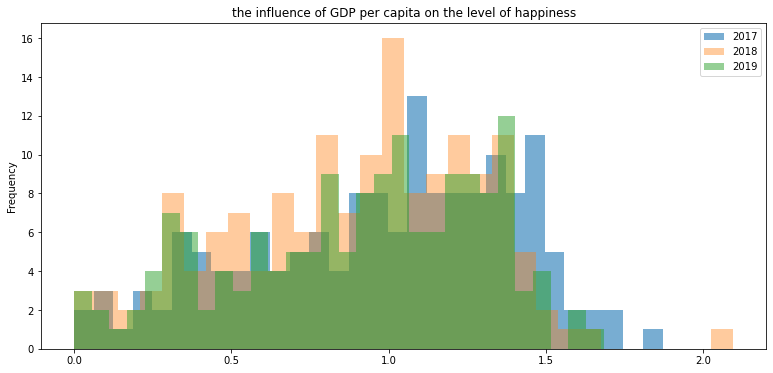

In [237]:

# df_2015.GDP_per_Capita.plot(kind='hist', 
#                    bins=20,
#                    ls='dashed', alpha = 0.7,
#                    title='the influence of GDP per capita on the level of happiness',
#                    label='2015'
#                    )
# df_2016.GDP_per_Capita.plot(kind='hist', 
#                    bins=30,
#                    ls='dashed', alpha = 0.6,
#                    title='the influence of GDP per capita on the level of happiness',
#                    label='2016'
#                    )
df_2017.GDP_per_Capita.plot(kind='hist', 
                   bins=30,
                   ls='dashed', alpha = 0.6,
                   title='the influence of GDP per capita on the level of happiness',
                   label='2017'
                   )
df_2018.GDP_per_Capita.plot(kind='hist', 
                   bins=30,
                   ls='dashed', alpha = 0.4,
                   title='the influence of GDP per capita on the level of happiness',
                   label='2018'
                   )
df_2019.GDP_per_Capita.plot(kind='hist', 
                   bins=30,
                   ls='dashed', alpha = 0.5,
                   title='the influence of GDP per capita on the level of happiness',
                   label='2019'
                   )
plt.legend()

# Распределение имеет характерную середину, большее количество значений в середине диапазона.
# очень небольшое количество "переоценивают" влияние ВВП на уровень счастья.
# В 2015 вклад ВВП в уровень счастья оценивали невысоко. Довольно много относительно "низких" оценок


In [188]:
df_thebest = thebest[['Country', 'Family', 'Freedom', 'Trust', 'GDP_per_Capita', 'Health_Life_Expectancy', 'Social_support', 'Generosity']].groupby('Country').mean()

<AxesSubplot:ylabel='Country'>

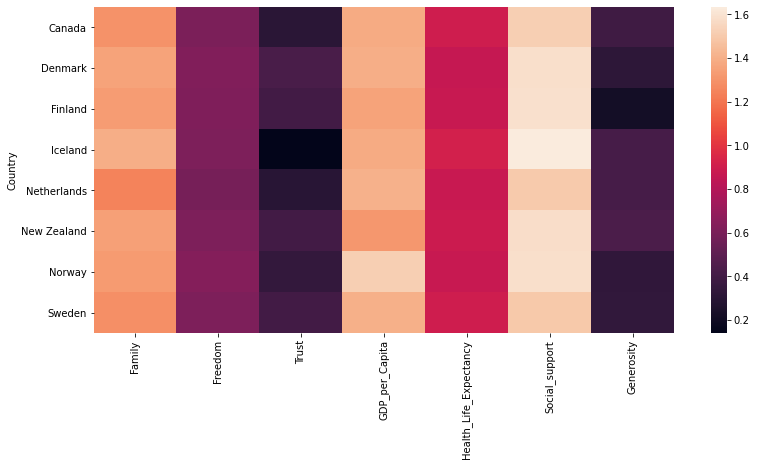

In [193]:
# Рецепт счастья.
# В десятке самых счастливых из года в год оказываются 8 стран, поэтому тепловую карту создаем для тех, кто "счастлив регулярно".
# В результате можно сказать, что наибольшее значение для счастья имеют: меры социальной поддержки гражан, уровень экономики 
# в стране (показателем которого является ВВП), а также крепкие семейные отношения. Достаточно большкю важность имеет ожидаемая
# продолжительность жизни, впрочем поскольку речь идет о крепкой экономике, то и ОПЖ в этих странах достаточно высокая, а значит 
# придавать особое значение ей не будут. Значительно меньший вклад в ощущение счастья вкладывают отношение к свободе и доверие государству.
# Показатель "щедрость" слишком невнятный, что имеется ввиду под ним непонятно, возможно имеется ввиду возможность проявить щедрость
# на государственном или личном уровне, в любом случае, это показатель не вносит большого значения в уровень ощущения себя счастливым.
sns.heatmap(df_thebest[2:10])